In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
ex1data1 = pd.read_csv("ex1/ex1data1.txt", header=None, names=['population','profit'])
ex1data2 = pd.read_csv("ex1/ex1data2.txt",header=None,names=['sqft','bedrooms','price'])
ex1data1['intercept']=1
ex1data2['intercept']=1

In [80]:
num_samples = ex1data1.shape[0]
num_samples_multi = ex1data2.shape[0]

Define the hypothesis function $h(\boldsymbol{\theta},x) = \theta_0 + \theta_1 x$ and cost function $J(\theta) = \frac{1}{2m}\sum_i^m (h(\theta,x^{i})-y^{i})^2$

In [67]:
X_array = ex1data1['population'].values
y_array = ex1data1['profit'].values

def hypothesis(theta,X):
    return theta[0] + theta[1]*X

def cost(theta):
    return 1/(2*num_samples)*np.sum(np.power(hypothesis(theta, X_array) - y_array,2))

In [74]:
cost([0,0])

32.072733877455676

Given samples of feature $X$ and output $y$, minimize cost function using gradient descent to predict parameter vector. Gradient descent runs for `iters` interations with learning rate $\alpha$. Returns parameter vector $(\theta_0,\theta_1)$

In [70]:
cost_array = []
def gradient_descent(iters,alpha,theta_start,X,y):
    theta_current = theta_start
    for j in range(iters):
        error = hypothesis(theta_current,X)-y
        theta_current[0] = theta_current[0] - (alpha/num_samples)*np.sum(error)
        theta_current[1] = theta_current[1] - (alpha/num_samples)*np.dot(error,X_array)
        cost_array.append(cost(theta_current))
    return theta_current

In [71]:
theta_predict = gradient_descent(5000,0.01,np.zeros((2,1)))

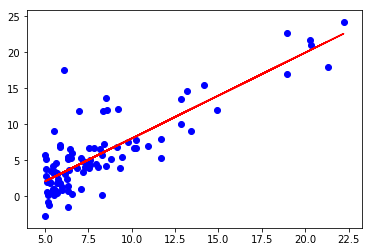

In [72]:
plt.plot(X_array,hypothesis(theta_predict,X_array),color='red')
plt.scatter(X_array,y_array,color='blue')

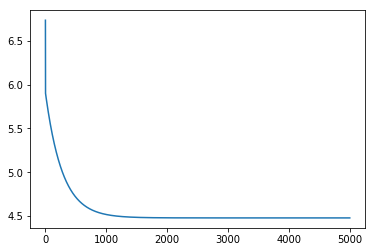

In [73]:
plt.plot(cost_array)

Now we implement feature normalization. Given a feature matrix $X$, we want to normalize each column by subtracting the column mean and dividing by the column standard deviation.

In [85]:
def feature_normalize(X):
    subtract_mean = lambda x: x - np.mean(x)
    scale = lambda x: x/np.std(x)
    X_normalized = np.apply_along_axis(subtract_mean,0,X)
    X_normalized = np.apply_along_axis(scale,0,X_normalized)
    return X_normalized

In [86]:
feature_normalize(X_array)

array([-0.53240565, -0.68368294,  0.09319761, -0.30042464, -0.5974206 ,
        0.0579498 , -0.17751184,  0.10865262, -0.4347144 , -0.80656976,
       -0.63614904,  1.55957946, -0.63009691,  0.06457337, -0.6543314 ,
       -0.72220358, -0.46609197, -0.78695878, -0.44941614, -0.28286567,
       -0.51188555,  3.14560127, -0.69344947, -0.47630007, -0.67402031,
        2.80143506,  1.21255602,  0.72656735,  1.30294835,  3.64769432,
       -0.75519159, -0.40790839,  0.28270982, -0.58910866,  0.01332508,
       -0.05880697, -0.0165979 , -0.66326674,  1.214634  , -0.46920894,
       -0.71506051, -0.33177623,  0.92163816, -0.61978491, -0.08704158,
       -0.27707328, -0.80251769, -0.61258989,  0.91956017, -0.68007244,
       -0.16093991, -0.74082752, -0.19114862, -0.14460176, -0.47455975,
       -0.46778033, -0.48978099, -0.65459115,  0.2988142 ,  0.33606207,
        0.17288833, -0.77417917,  3.40768709,  1.75283204,  2.80507153,
       -0.2445788 ,  0.03514392,  0.53928898, -0.69103381,  3.16

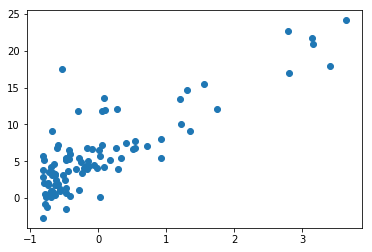

In [87]:
plt.scatter(feature_normalize(X_array),y_array)